Nama : Rizki Alamsyah

Kota Asal : Depok, Jawa Barat

Email : rilamsyah11@gmail.com



**Import Library yand dibutuhkan**

Library tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # cek versi tensorflow
print(tf.__version__) 

2.5.0


Library yang lainnya

In [5]:
# Library untuk ekstrak dan atur lokasi file
import zipfile,os,shutil
import numpy as np
from sklearn.model_selection import train_test_split
# Library untuk  upload file googlecolab dan plot
from matplotlib import pyplot as plt
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

**Download Datasetnya menggunakan wget**




In [6]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-17 06:21:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.31MB/s    in 4m 53s  

2021-06-17 06:26:46 (1.05 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



Ekstrak dataset yang sudah di download

In [7]:
import zipfile   
ekstrak_zip = 'rockpaperscissors.zip'
out_zip = zipfile.ZipFile(ekstrak_zip, 'r')
out_zip.extractall('/content')
out_zip.close()

**Mengatur Lokasi Dataset**

In [24]:
import os
# mendefinisikan nama direktori untuk data latih dan data validasi
dir_dataset = "/content/rockpaperscissors/rps-cv-images"
dir_kertas = os.path.join("/content/rockpaperscissors/rps-cv-images/paper")
dir_batu = os.path.join("/content/rockpaperscissors/rps-cv-images/rock")
dir_gunting = os.path.join("/content/rockpaperscissors/rps-cv-images/scissors")

In [25]:
# Mengecek jumlah data  batu kertas gunting
total_kertas = len(os.listdir(dir_kertas))
total_batu = len(os.listdir(dir_batu))
total_gunting = len(os.listdir(dir_gunting))


print("Total Data Gambar Kertas       : ",total_kertas)
print("Total Data Gambar Batu        : ",total_batu)
print("Total Data Gambar Gunting   : ",total_gunting)

Total Data Gambar Kertas       :  712
Total Data Gambar Batu        :  726
Total Data Gambar Gunting   :  750


**Implementasi Menggunakan Image Generator untuk Pengolahan gambar berdasarkan Training dan Validation**





In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator               
# proses augmentasi gambar pada sampel data training
train_dir = "/content/rockpaperscissors/rps-cv-images/"                          
train_datagen = ImageDataGenerator(                                               
    rescale = 1./255,                                                             
    rotation_range=40,                                                            
    width_shift_range=0.2,                                                        
    height_shift_range=0.2,                                                       
    shear_range=0.2,                                                              
    zoom_range=0.2,
    #Melakukan putar balik gambar                                                               
    horizontal_flip=True,                                                         
    fill_mode='nearest',
    #40% ukuran Data set Validasi dan 60% ukuran Data set Training                                                          
    validation_split=0.4                                                          
)
# proses augmentasi gambar pada sampel data validation
Validation_datagen = ImageDataGenerator(                                               
    rescale = 1./255,                                                             
    rotation_range=40,                                                            
    width_shift_range=0.2,                                                        
    height_shift_range=0.2,                                                       
    shear_range=0.2,                                                              
    zoom_range=0.2,
    #Melakukan putar balik gambar                                                               
    horizontal_flip=True,                                                         
    fill_mode='nearest',
    #40% ukuran Data set Validasi dan 60% ukuran Data set Training                                                          
    validation_split=0.4                                                          
)

**pembagian data set training dan validation menggunakan DataSet Image Generator**

In [12]:
train_generator = train_datagen.flow_from_directory( 
    # direktori data latih                             
    train_dir,                                                                    
    target_size=(100,150),                                                       
    batch_size=16,
    #klasifikasi untuk Kelas mode data kategori                                                                 
    class_mode='categorical',                                                     
    subset='training')                                                            

validation_generator = train_datagen.flow_from_directory( 
    # direktori data validation                        
    train_dir,                                                                    
    target_size=(100,150),                                                        
     batch_size=16,
     #klasifikasi untuk Kelas mode data kategori                                                                
    class_mode='categorical',                                                     
    subset='validation')                                                          

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Membuat Model Sequential**

In [13]:
#arsitektur CNN
model = tf.keras.models.Sequential([
    # Conv2D untuk mengekstrak gambar
    # Konvulasi Pertama 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    # max pooling untuk mengurangi resolusi gambar
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #512 Neuron Hidden Layer (Perceptron)
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #Layer Output
    tf.keras.layers.Dense(3, activation='softmax')
])

Model Compile menggunakan Optimizer

In [15]:
model.compile( 
              loss = 'categorical_crossentropy',                                  
              optimizer=tf.optimizers.Adam(),                                                                            
              metrics=['accuracy']                                                
              )   

**Membuat callback function untuk stop training**

In [16]:
class myCallback(tf.keras.callbacks.Callback):                
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.90):
      #menampilkan tulisan Apabila akurasi mencapai 90% atau diatas training akan berhenti
      print("\nTingkat Akurasi sudah mencapai target 90%!")
      #jika benar model akan di stop                        
      self.model.stop_training = True                                            
callbacks = myCallback()

**Training Model menggunakan metode fit**

In [17]:
history=model.fit(
    train_generator,
    # Jumlah batch yang akan dieksekusi untuk setiap epoch 
    steps_per_epoch=15,                                                          
    epochs=50,                                                                   
    # menampilkan akurasi pengujian data validasi
    validation_data=validation_generator,   
    validation_steps=5,
    # Memanggil fungsi callbacks                                                        
    callbacks=[callbacks],                                                      
    verbose=2
    )

Epoch 1/50
15/15 - 11s - loss: 1.1217 - accuracy: 0.3083 - val_loss: 1.0970 - val_accuracy: 0.3375
Epoch 2/50
15/15 - 9s - loss: 1.0968 - accuracy: 0.3496 - val_loss: 1.0946 - val_accuracy: 0.4500
Epoch 3/50
15/15 - 10s - loss: 1.0966 - accuracy: 0.3667 - val_loss: 1.0937 - val_accuracy: 0.3500
Epoch 4/50
15/15 - 10s - loss: 1.0868 - accuracy: 0.4083 - val_loss: 1.0626 - val_accuracy: 0.3125
Epoch 5/50
15/15 - 10s - loss: 1.0617 - accuracy: 0.4958 - val_loss: 0.9038 - val_accuracy: 0.7250
Epoch 6/50
15/15 - 10s - loss: 0.9366 - accuracy: 0.5875 - val_loss: 0.8541 - val_accuracy: 0.6250
Epoch 7/50
15/15 - 9s - loss: 0.8730 - accuracy: 0.5796 - val_loss: 0.6408 - val_accuracy: 0.6875
Epoch 8/50
15/15 - 9s - loss: 0.6618 - accuracy: 0.6903 - val_loss: 0.8196 - val_accuracy: 0.5625
Epoch 9/50
15/15 - 10s - loss: 0.6865 - accuracy: 0.6958 - val_loss: 0.9647 - val_accuracy: 0.5625
Epoch 10/50
15/15 - 9s - loss: 0.5785 - accuracy: 0.7522 - val_loss: 0.5746 - val_accuracy: 0.7875
Epoch 11/50
1

Memvisualisasikan Data Akurasi dari Training dan Validation

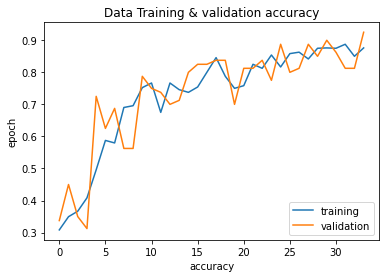

In [18]:
#Memvisualisasikan akurasi ke dalam bentuk grafik
plt.plot(history.history['accuracy'])                                            
plt.plot(history.history['val_accuracy'])                                        
plt.title('Data Training & validation accuracy')                               
plt.xlabel("accuracy")                                                           
plt.ylabel("epoch")                                                              
plt.legend(['training', 'validation'],loc= 'lower right')                        

plt.show()        

Memvisualisasikan Data Loss dari Training dan Validation

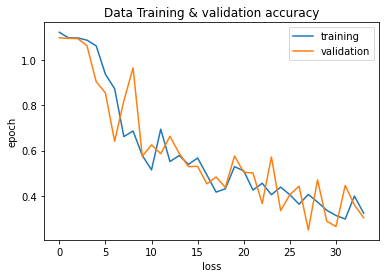

In [19]:
#Memvisualisasikan loss ke dalam bentuk grafik
plt.plot(history.history['loss'])                                                
plt.plot(history.history['val_loss'])                                             
plt.title('Data Training & validation accuracy')                                
plt.xlabel("loss")                                                               
plt.ylabel("epoch")                                                               
plt.legend(['training', 'validation'],loc= 'upper right')                         

plt.show()                   


Saving Sampel3.png to Sampel3.png
Sampel3.png
Gambar ini Terindentifikasi sebagai gambar Gunting


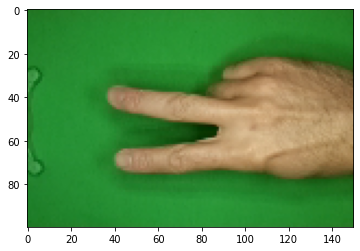

In [27]:
# mengupload file untuk proses identifikasi
upload = files.upload()
 
for files_upload in upload.keys():
 
  path = files_upload
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
 # Membuat numpy vstack array untuk hasil prediksi 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)

# Pengkondisian 
# Ketika  0  maka teridentifikasi Kertas
# Ketika  1 maka teridentifikasi Batu
# Selain itu maka teridentifikasi Gunting
  print(files_upload)
if output_class==0:
    print('Gambar ini Terindentifikasi sebagai gambar Kertas')
elif output_class==1:
    print('Gambar ini Terindentifikasi sebagai gambar Batu')
else:
    print('Gambar ini Terindentifikasi sebagai gambar Gunting')